# KNN ALGORİTMASI TUTORİAL

* Import Dataset
* Dataset Tanıtımı
* Dataset Görselleştirme
* KNN Algoritmasının Açıklanması
* Sklearn kütüphanesini kullanarak KNN Implementasyonu

***

### KNN = K-Nearest Neighnout = K-En Yakın Komşu

1. K değerini seç
2. K değerine göre en yakın data noktalarını bul
3. K değerine göre en yakın komşu arasında hangi class'tan kaç tane var hesapla
4. Test ettiğimiz point ya da data hangi class'a ait tespit et

* KNN Algoritmasında Euclidian Distance kullanılır.
* KNN Algoritasının en önemli özelliklerinden biri, feature'lar arasında normalizasyon yapılmasıdır.

In [1]:
# Gerekli kütüphaneleri import edelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("dataset/data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

* **diagnosis* feature'u içerisinde iki adet sınıf var. Bunlar;**
    * **Malignant : M --> Kötü Huylu Tumor**
    * **Benign : B -----> İyi Huylu Tumor**
    
* **Veri seti içerisindeki *id* ve *Unnamed: 32* sütunları modelimizi oluştuturken işimize yaramayacağı için veri setinden çıkartıyoruz.**

In [6]:
data.drop(["id", "Unnamed: 32"], axis=1, inplace=True)

In [7]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
M = data[data["diagnosis"] == "M"]
B = data[data["diagnosis"] == "B"]

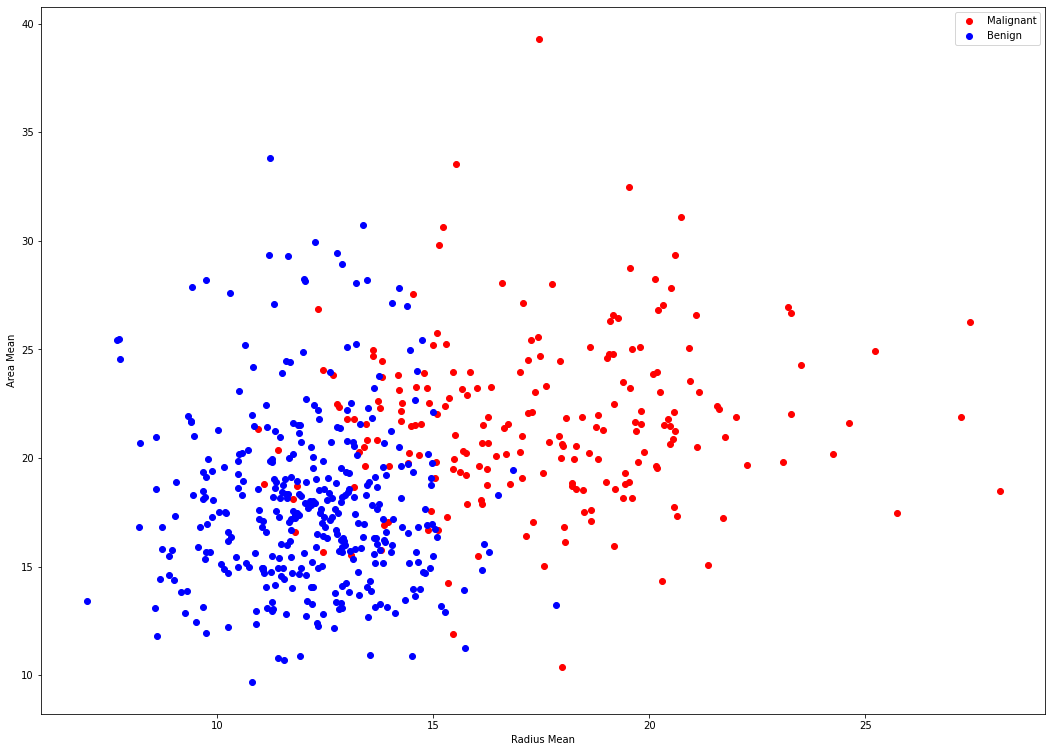

In [9]:
# Scatter Plot
plt.figure(figsize=(18,13))
plt.scatter(M["radius_mean"], M["texture_mean"], color="red", label="Malignant")
plt.scatter(B["radius_mean"], B["texture_mean"], color="blue", label="Benign")
plt.xlabel("Radius Mean")
plt.ylabel("Area Mean")
plt.legend()
plt.show()

In [10]:
# M : 1
# B : 0
data["diagnosis"] = [1 if each == "M" else 0 for each in data.diagnosis]

In [11]:
# X ve y değerlerimizi alalım
y = data["diagnosis"].values
X_data = data.drop(["diagnosis"], axis=1)

In [12]:
# Normalization
X = (X_data - np.min(X_data))/(np.max(X_data)-np.min(X_data))

/home/can/anaconda3/envs/introMlEnv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/can/anaconda3/envs/introMlEnv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [13]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [14]:
# KNN modelimizi oluşturalımprint(prediction)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k

In [15]:
# KNN modelimizi fit edelim
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
# Tahmin işlemi gerçekleştirelim
prediction = knn.predict(X_test)

In [17]:
print(prediction)

[0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0]


In [18]:
# Modelin skor değerini inceleyelim
print("{}-nn Score: {} ".format(3, knn.score(X_test,y_test)))

3-nn Score: 0.9532163742690059 


In [19]:
# Birden fazla K değeri için oluşacak sonuçları inceleyelim

score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test,y_test))

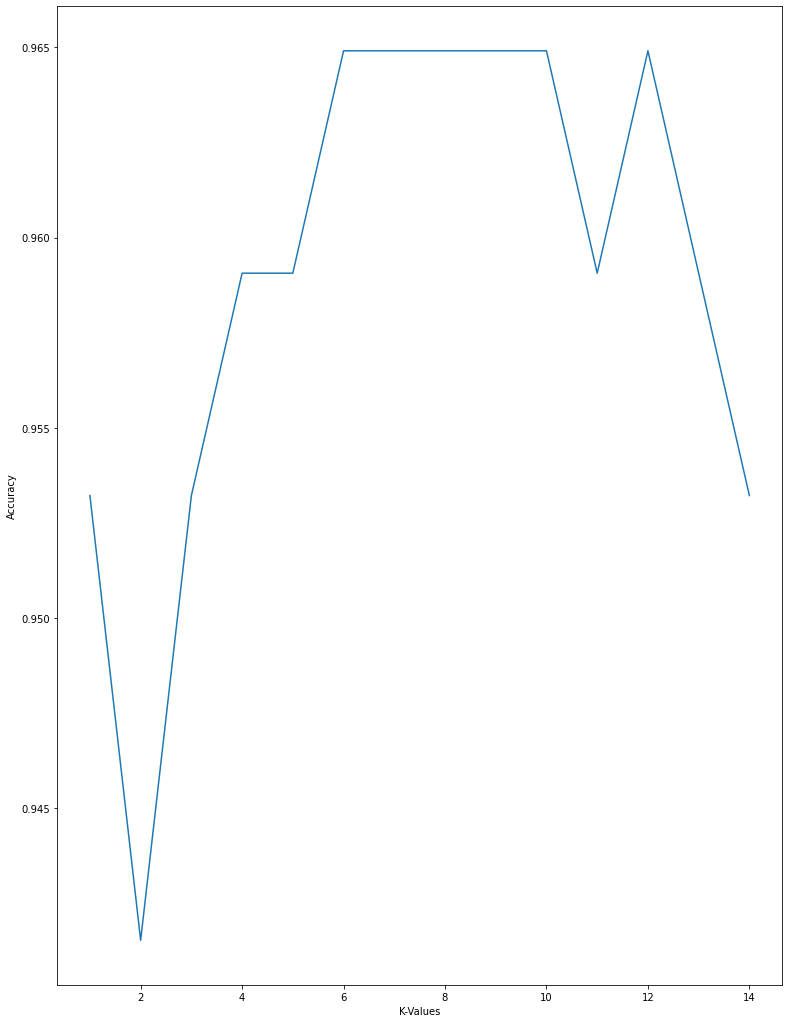

In [20]:
# Elde ettiğimiz sonuçları görselleştirelim
plt.figure(figsize=(13, 18))
plt.plot(range(1,15), score_list)
plt.xlabel("K-Values")
plt.ylabel("Accuracy")
plt.show()

Buna göre K değeri 6 ile 10 değeri arasındaki değerler seçilebilir. Optimum çalışma için 6 seçilmelidir.